Importing the Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
#loading the data from csv file to panda dataframe
car_dataset = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
#inspecting the first 5 rows of the dataframe
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
#checking thenumber of rows and columns
car_dataset.shape

(4340, 8)

In [ ]:
# grating the information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
#checking the number of misssing values
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
# cheking the distributer of categorical data
print(car_dataset['fuel'].value_counts())
print(car_dataset['seller_type'].value_counts())
print(car_dataset['transmission'].value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


Encoding the Categorical Data


In [ ]:
import pandas as pd

# Set the option to opt-in to the future behavior for downcasting
pd.set_option('future.no_silent_downcasting', True)

car_dataset['fuel'] = car_dataset['fuel'].replace({'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4})
car_dataset['seller_type'] = car_dataset['seller_type'].replace({'Dealer':0,'Individual':1,'Trustmark Dealer':2})
car_dataset['transmission'] = car_dataset['transmission'].replace({'Manual':0,'Automatic':1})
car_dataset['owner'] = car_dataset['owner'].replace({'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4})

In [ ]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1


In [ ]:
X = car_dataset.drop(['name','selling_price'],axis=1)
Y = car_dataset['selling_price']

In [ ]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

Model  Training

1 Linear Regression

In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared Error:", error_score)

R Squared Error: 0.42763612850186783


visualize the actual price and predict price

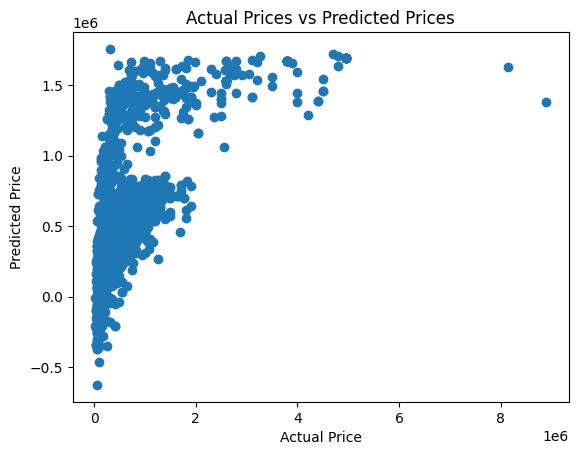

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


In [ ]:
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5027999353753417


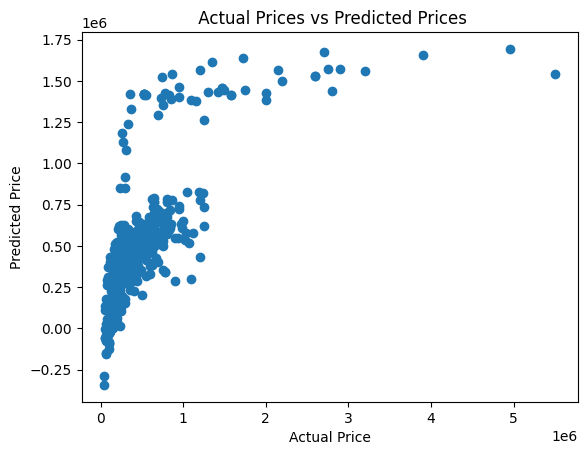

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# loading the linear regression model
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

*Model*    **Evalution**




In [ ]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.42763612844686605


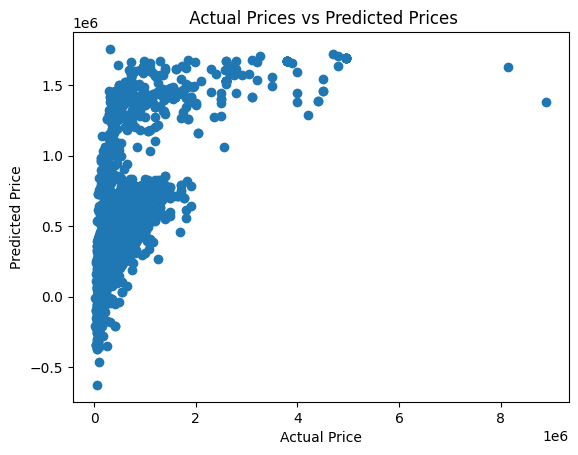

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
test_data_prediction = lass_reg_model.predict(X_test)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5027994839428178


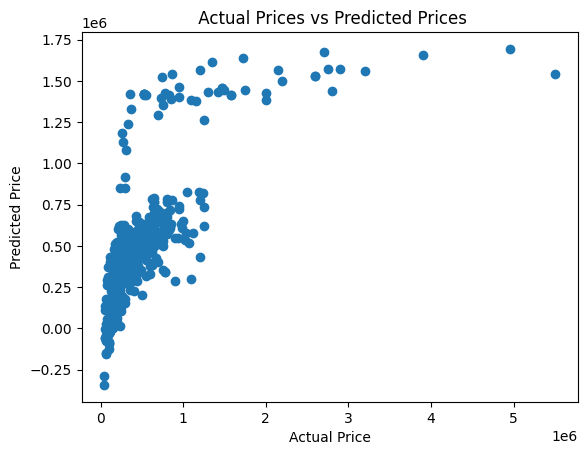

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()